In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.chdir('..')
import rwpropa as rw

init statistics plotting class


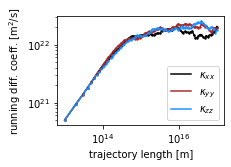

diffusion coefficients computed between 4.33e+16m and 1.00e+17m with 10 data points
kappa_{xx}: 1.54e+22 m²/s +- 2.27e+21 m²/s
kappa_{yy}: 1.93e+22 m²/s +- 1.49e+21 m²/s
kappa_{zz}: 1.95e+22 m²/s +- 1.99e+21 m²/s


In [3]:
df = pd.read_pickle("isotropic_100.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=10)

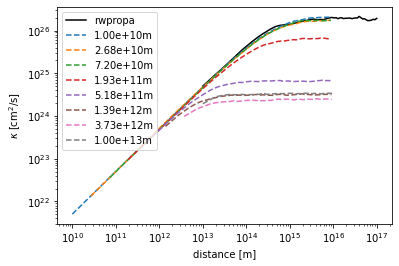

In [4]:
### load crpropa data
step_sizes = np.logspace(10, 13, 8)

fig, ax1 = plt.subplots(figsize=(6,4))

# rwpropa 
plt.plot(df_kappas['d'], ((df_kappas['kappa_xx']**2+df_kappas['kappa_yy']**2+df_kappas['kappa_zz']**2)/3)**0.5*10**4, label='rwpropa', color='k')


for step_size in step_sizes:
    crp_d = np.load('comparison/data/sim_result_ana_'+str(step_size/10**11)+'_d.npy')
    crp_kappa_perp = np.load('comparison/data/sim_result_ana_'+str(step_size/10**11)+'_kappa_perp.npy')
    crp_kappa_para = np.load('comparison/data/sim_result_ana_'+str(step_size/10**11)+'_kappa_para.npy')

    
    n_max = -1
    ax1.plot(crp_d[:n_max], np.array(crp_kappa_perp[:n_max])*10**4, ls='--', label=str("{:.2e}".format(step_size))+'m')
    #ax1.plot(crp_d[:n_max], np.array(crp_kappa_para[:n_max])*10**4, linestyle=':', label='$\kappa_\parallel$ (EOM)', color='r')




ax1.set_xlabel('distance [m]')
#ax1.axvline(x=mfp[1], c='grey', ls=':')
#ax1.axvline(x=mfp[2], c='grey', ls='--')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

plt.legend()
    #plt.savefig('kappas_bB_'+str(bB)+'.pdf')
plt.show()

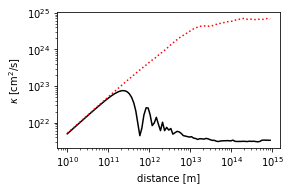

In [7]:
### load crpropa data
bB = 0.1
crp_d = np.load('sim_result_ana_d.npy')
crp_kappa_perp = np.load('sim_result_ana_kappa_perp.npy')
crp_kappa_para = np.load('sim_result_ana_kappa_para.npy')

fig, ax1 = plt.subplots(figsize=(4,2.5))

n_max = -1
ax1.plot(crp_d[:n_max], np.array(crp_kappa_perp[:n_max])*10**4, label='$\kappa_\perp$ (EOM)', color='k')
ax1.plot(crp_d[:n_max], np.array(crp_kappa_para[:n_max])*10**4, linestyle=':', label='$\kappa_\parallel$ (EOM)', color='r')


ax1.set_xlabel('distance [m]')
#ax1.axvline(x=mfp[1], c='grey', ls=':')
#ax1.axvline(x=mfp[2], c='grey', ls='--')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

#fig.legend()
#plt.savefig('kappas_bB_'+str(bB)+'.pdf')
plt.show()

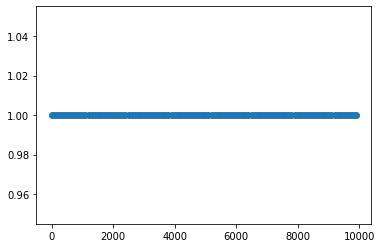

In [45]:
log_list = []
dist = 100
nr = 100
minimum = 1
for i in range(nr):
    value = minimum + i*dist
    log_list.append(value)
    
plt.scatter(log_list, np.ones(len(log_list)))

[]

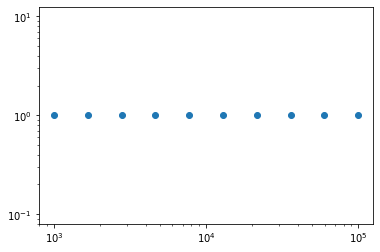

In [88]:
log_list = []
dist = 1000
nr = 10
start = 10**3
end = 10**5
for i in range(0,nr):
    f = start * np.power(end/start*1.0, i/(nr-1.0))
    log_list.append(f)
    
plt.scatter(log_list, np.ones(len(log_list)))
plt.loglog()

[]

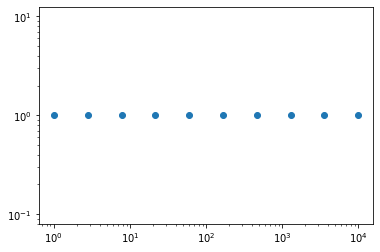

In [70]:
plt.scatter(np.logspace(0, 4, nr), np.ones(nr))
plt.loglog()